<a href="https://colab.research.google.com/github/tohocho/SistemasDistribuidosll/blob/master/Clase_SDUll_14_05_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Semana 2

 - Descargar datos de NYCT (New York City Taxis)

In [0]:
import numpy as np
import pandas as pd
import psutil, os
import matplotlib.pyplot as plt

In [1]:
!wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv

--2019-05-14 15:53:08--  https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.112.125
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.112.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 772098307 (736M) [text/csv]
Saving to: ‘yellow_tripdata_2018-01.csv’

yellow_tripdata_201 100%[===================>] 736.33M  88.7MB/s    in 8.1s    

2019-05-14 15:53:16 (90.7 MB/s) - ‘yellow_tripdata_2018-01.csv’ saved [772098307/772098307]



In [4]:
!wc -l yellow_tripdata_2018-01.csv

8759876 yellow_tripdata_2018-01.csv


Vamos a escribir un programa para automatizar ladescarga de todo 2018

In [0]:
plantilla ='yellow_tripdata_2018-{:02d}.csv'
plantillaURL = 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/' + plantilla

In [0]:
for y in range (1,13):
  print (plantillaURL.format(y))

In [0]:
comandos = [plantillaURL.format(y) for y in range (1,13)]

In [0]:
comandos

In [16]:
(plantillaURL.format(y) for y in range (1,13))

<generator object <genexpr> at 0x7f441ac78fc0>

In [0]:
# vamos a descargar los datos usando la instrucción en lista de comandos
comandos = [plantillaURL.format(y) for y in range (1,4)]
for cmd in comandos:
  os.system(cmd)
  

#Accediendo a los datos con pandas

In [0]:
archivo = 'yellow_tripdata_2018-01.csv'

In [0]:
df = pd.read_csv(archivo)

In [22]:
sum(df.memory_usage(index=False)/(1024**2))

1136.153091430664

In [0]:
for trozo in pd.read_csv(archivo, chunksize=50000):
  print('type: %s shape %s' % (type(trozo), trozo.shape))

In [27]:
trozo.shape

(9874, 17)

In [32]:
trozo.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8750000,2,2018-01-31 23:36:22,2018-01-31 23:46:11,1,1.8,1,N,162,186,1,8.5,0.5,0.5,1.96,0.0,0.3,11.76
8750001,1,2018-01-31 23:41:34,2018-01-31 23:45:40,2,1.0,1,N,234,79,1,5.5,0.5,0.5,2.00,0.0,0.3,8.80
8750002,1,2018-01-31 23:26:35,2018-01-31 23:29:48,2,0.6,1,N,234,170,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95
8750003,1,2018-01-31 23:15:56,2018-01-31 23:16:09,1,9.6,1,N,77,77,3,2.5,0.5,0.5,0.00,0.0,0.3,3.80
8750004,1,2018-01-31 23:17:26,2018-01-31 23:17:42,1,9.6,1,N,77,77,3,2.5,0.5,0.5,0.00,0.0,0.3,3.80


Vamos a definir una condición de `es_un_viaje_largo` si el valor en la coumna de `trip_distance` es mayor a 10 millas (aproximadamente 16km)

In [35]:
es_un_viaje_largo = (trozo.trip_distance > 10)
es_un_viaje_largo.head()

8750000    False
8750001    False
8750002    False
8750003    False
8750004    False
Name: trip_distance, dtype: bool

In [37]:
trozo.loc[es_un_viaje_largo].shape

(431, 17)

Encapsular esta operación de filtrado en una función

In [0]:
def filtra_es_un_viaje_largo(data):
  es_un_viaje_largo = (data.trip_distance > 10)
  return data.loc[es_un_viaje_largo]

In [0]:
trozos = []
for trozo in pd.read_csv(archivo, chunksize=500000):
  trozos.append(filtra_es_un_viaje_largo(trozo))

In [40]:
len(trozos)

18

Es conveniente usar **comprensión de lista** para generar la lista anterior

In [41]:
trozos = [filtra_es_un_viaje_largo(trozo) for trozo in pd.read_csv(archivo, chunksize=500000)]
len(trozos)

18

In [47]:
tamaño = [len(trozo) for trozo in trozos]
sum(tamaño)

466814

In [46]:
np.mean(tamaño)

25934.11111111111

Vamos a concatenar todos estos trozos en una nueva estructura de datos **DataFrame**, dicha estructura deberá tener cuantos registros?

In [49]:
viajes_largos_df = pd.concat(trozos)
viajes_largos_df.shape

(466814, 17)

Ahora vamos a visualizar parte de los datos filtrados

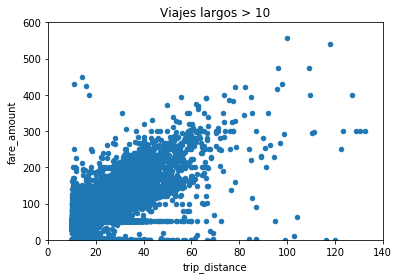

In [57]:
viajes_largos_df.plot.scatter(y='fare_amount', x='trip_distance', title='Viajes largos > 10', xlim=(0,140), ylim=(0,600))

#Generadores

In [70]:
trozos = (filtra_es_un_viaje_largo(trozo) for trozo in pd.read_csv(archivo, chunksize=500000))
trozos

<generator object <genexpr> at 0x7f43fe5ab4c0>

In [67]:
[trozo['trip_distance'].sum() for trozo in trozos]

[579487.8400000001,
 386443.42000000004,
 433314.4,
 496842.47,
 400113.88,
 414900.72,
 362745.43,
 476153.82999999996,
 390090.69,
 363877.14,
 350500.29000000004,
 458973.98,
 373223.47,
 372922.38999999996,
 338968.49000000005,
 418938.05,
 547242.93,
 174890.21000000002]

In [0]:
distancias = (trozo['trip_distance'].sum() for trozo in trozos)

In [72]:
sum(distancias)

7339629.629999999

Vamos a leer muchos archivos

In [0]:
df = pd.read_csv('yellow_tripdata_2018-01.csv', parse_dates=[1,2])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: datetime64[ns](2), float64(8), int64(6), object(1)
memory usage: 1.1+ GB


In [77]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [0]:
def cuenta_viajes_tardados(df):
  df['duracion'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.seconds
  es_viaje_tardado = df.duracion > 1200
  result_dict = {'n_long': [sum(es_viaje_tardado)], 'n_total': [len(df)]}
  return pd.DataFrame(result_dict)

In [0]:
archivos = [plantilla.format(y) for y in range (1,4)]

In [0]:
dataframes = (pd.read_csv(archivo, parse_dates=[1,2]) for archivo in archivos)

In [0]:
totales = (cuenta_viajes_tardados(df) for df in dataframes)

In [0]:
totales_trimestrales = sum(totales)

In [85]:
totales_trimestrales

,n_long,n_total
0,4942465,26682326


In [86]:
totales_trimestrales['n_long']/totales_trimestrales['n_total']

0    0.185234
dtype: float64